In [1]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('stars.csv', encoding ='utf8', sep=',')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [16]:
df = pd.read_csv('stars - editado.csv', encoding ='utf8', sep=',')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral class,Star type
0,3068,24.0,0.170,16.12,8,5,0
1,3042,5.0,1.542,16.60,8,5,0
2,2600,3.0,102.000,18.70,8,5,0
3,2800,2.0,0.160,16.65,8,5,0
4,1939,138.0,103.000,20.06,8,5,0


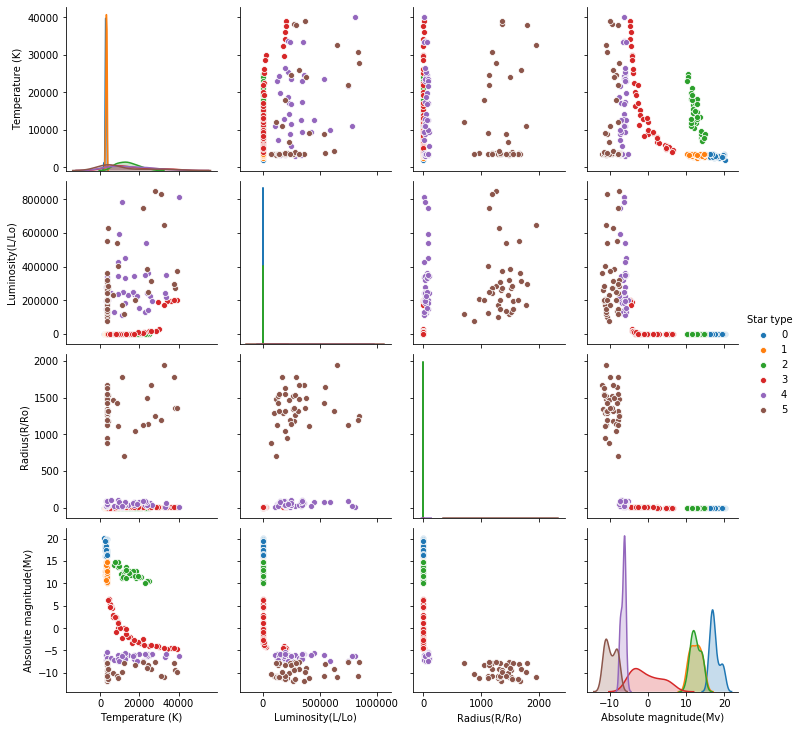

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data = data, hue = "Star type")

In [30]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df) 
    kmeanModel.fit(df)     
      
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

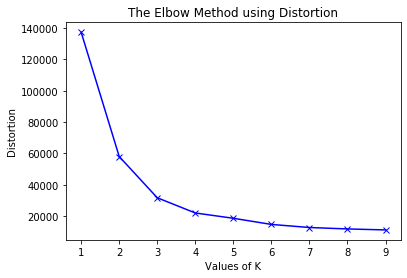

In [31]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [37]:
 conda install -c conda-forge kneed

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Users\Cepeti2\anaconda3

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    kneed-0.7.0                |     pyh9f0ad1d_0          12 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  kneed              conda-forge/noarch::kneed-0.7.0-pyh9f0ad1d_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> conda-forge::conda-4.8.5-py37hc8dfbb8_1




conda-4.8.5 



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda




In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[0:7])

In [44]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [45]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [47]:
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)

3.6846278050653836
[[-2.16296158  1.99260517  1.0044215   1.99253486  0.          0.
   0.        ]
 [ 0.66125287 -0.43132612 -0.8577763  -0.6848306   0.          0.
   0.        ]
 [-0.24102495 -0.13365035  1.21334184  0.37339376  0.          0.
   0.        ]]
4


In [63]:
kmeans.labels_

array([2, 5, 4, 6, 3, 0, 1])

In [60]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [69]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

ValueError: Number of labels is 7. Valid values are 2 to n_samples - 1 (inclusive)